# Predicting the Forest Fires

## Problem 
Forest Fires is creating economic damage, Once forest fires happen it is hard to stop the damage, so Prevention is the key, so our ultimate aim is to create an model using machine learning algorithms and come them for our spatial dataset and predict the forest fires area.

## The Data
We found the Forest fires dataset from the UCIrvine Machine Learning Repository which is an open source dataset of Montesinho Natural Park, Portugal,Basically x,y co ordinates are the grid representation of the Montesinho national park,FFMC,DMC,DC,ISI = Index from the FWI SYstem, RH = Relative Humidity

Credits: https://archive.ics.uci.edu/ml/datasets/forest+fires

## Category

Geo-AI

## The Approach

 **logistic regression** as well as **random forests**.

## Our hypothesis

Our project task consists of analyzing the data of Montesinho Natural Park forest area includes x and y spatial coordinates of the map and the factors that affect the such as a month, temperature, humidity and DMC, DM by Fire weather index system,This analysis will help in predicting the fire area and our project will also include project the predicted forest fire area in map


In [10]:
from IPython.display import HTML
HTML('<iframe width="600" height="315" src="https://www.youtube.com/embed/5hghT1W33cY?controls=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.8/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


This video shows us the seriousness and the factors that causes the forest fires

## **Basic setup**
### Pandas, SciKitLearn, and MatPlotLib
**Pandas** allows us to manipulate data frames easily. **SciKitLearn** includes many standard machine learning algorithms. **MatPlotLib** helps with creating visualizations.

Reading data from Google drive where we stored our data and accessing it and displaying the features below 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import f1_score


Loading our dataset from drive into colab notebook since we used colab 

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/forestfires.csv') 

In [14]:
print('features : ',df.columns)

features :  Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [15]:
dfcopy = df

##**Data Analysis**

### Analysing our data with the help of different visualization techniques
We first load our data and visulize to see how to work with our spatial data.Visulizing our data wit respect to **differen features**

###Burnt Area With respect to Month

In [16]:
Burnt = df['area']>0
Burntplace = df[Burnt]

In [17]:
montharea = Burntplace.groupby('month')['area'].agg('count')
montharea

month
apr     4
aug    99
dec     9
feb    10
jul    18
jun     8
mar    19
may     1
oct     5
sep    97
Name: area, dtype: int64

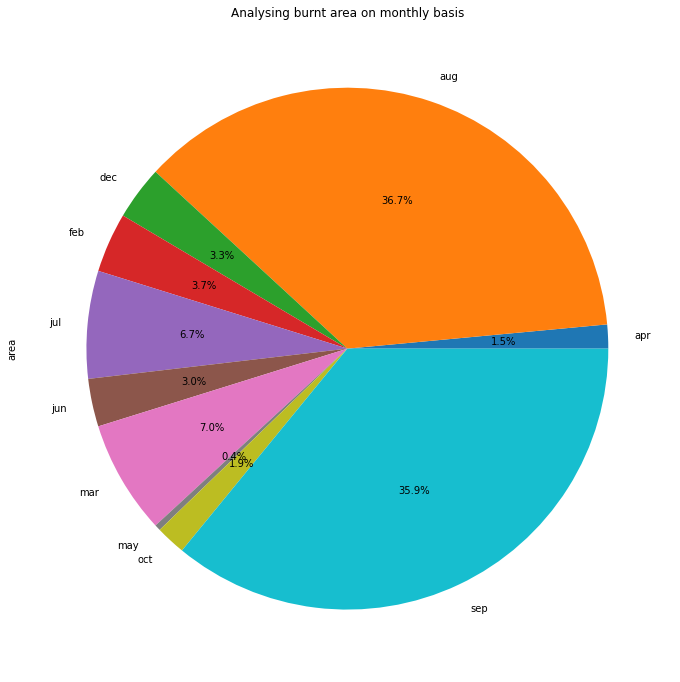

In [18]:
montharea.plot(kind='pie',title='Analysing burnt area on monthly basis',figsize=(12,12),autopct='%0.1f%%')

Here Months are January to December and we can clearly see that In the months of August and September High area is burnt and it is very severe in those months 

###Analysis Fettures in dataset with respect to the Month



Before we have analysed area burnt with respect to the month and now we are exploring other features

In [19]:
other_features = ['rain','temp','wind','RH','FFMC','DMC']
monthfeatures=pd.pivot_table(df,other_features,index='month',aggfunc=['mean'])

In [20]:
monthfeatures

mean                                                     
              DMC       FFMC         RH      rain       temp      wind
month                                                                 
apr     15.911111  85.788889  46.888889  0.000000  12.044444  4.666667
aug    153.732609  92.336957  45.489130  0.058696  21.631522  4.086413
dec     26.122222  84.966667  38.444444  0.000000   4.522222  7.644444
feb      9.475000  82.905000  55.700000  0.000000   9.635000  3.755000
jan      2.400000  50.400000  89.000000  0.000000   5.250000  2.000000
jul    110.387500  91.328125  45.125000  0.006250  22.109375  3.734375
jun     93.382353  89.429412  45.117647  0.000000  20.494118  4.135294
mar     34.542593  89.444444  40.000000  0.003704  13.083333  4.968519
may     26.700000  87.350000  67.000000  0.000000  14.650000  4.450000
nov      3.000000  79.500000  31.000000  0.000000  11.800000  4.500000
oct     41.420000  90.453333  37.466667  0.000000  17.093333  3.460000
sep    120.922674  91.243023  42.843023  0.000000  19.612209  3.557558

1. By Displaying the above We can Observe, DC,DMC,FFMC show that in the months of June, july,August, September Values are very high 
2. Also we can see that Top 4 high temperature also recorded in above those month itself
3. Anoth thing we can judge is that Low humidity may also be one of the reason for the Forest Fires 

###Visualization Of the Fires spread accross Area


---



From the above data we can see




Text(0, 0.5, 'Density of forest fire')

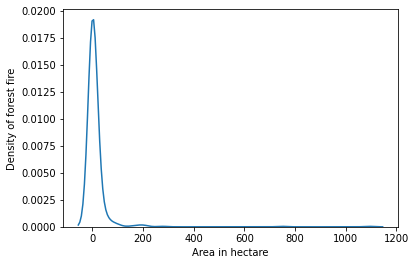

In [21]:
ax = sns.kdeplot(df['area'])
plt.xlabel('Area in hectare')
plt.ylabel('Density of forest fire')

So what does the above picture shows us, It shows that forest fires is not spreading very much and it is spreading less than the 200 hectare area, Below Visulization will also shows the area burnt

###Visualization Of the Area Burnt in the x, y Co-ordinates

Text(0, 0.5, 'Y cordinates of park')

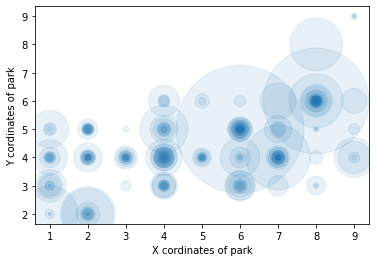

In [22]:
df.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=15*df['area'])
plt.xlabel('X cordinates of park')
plt.ylabel('Y cordinates of park')

BY Visulaizing the burnt "area" we observe that there are many hotspots in the maps and it also show the area spread accross and it doesn't spread much

###Visualization Of the Area Burnt withrespect to temperature

In [23]:
x=pd.unique(df.month)

In [24]:
q=[]
for i in x:
  j=df[df['month']==i]
  q.append(len(j))

Text(0.5, 0, 'Temp')

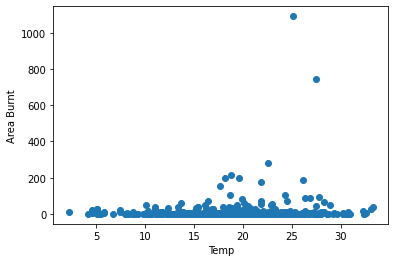

In [25]:
plt.scatter(df.temp,df.area)
plt.ylabel("Area Burnt")
plt.xlabel("Temp")

From the above Visulization of area with respect to temperature and there is not much use and we decided to drop temperature feature from the data

###Visualization Of the Correlation Map

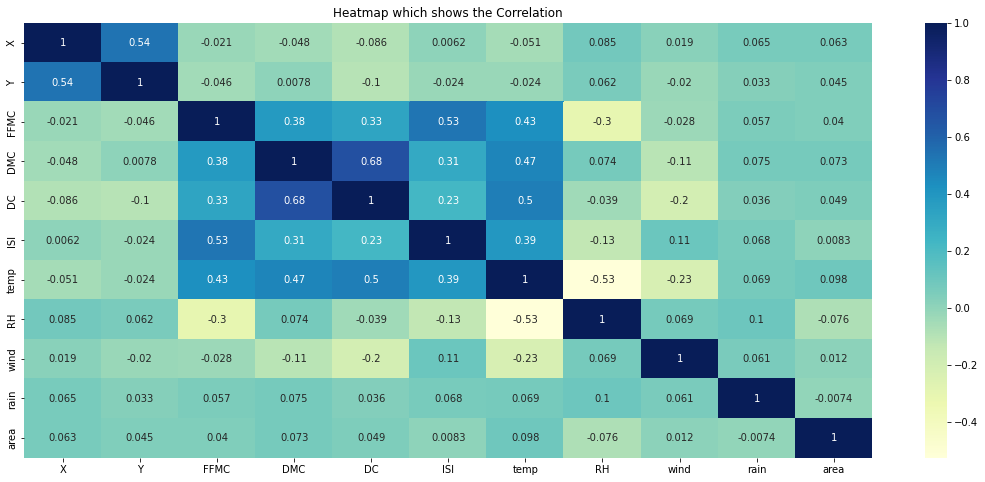

In [26]:
plt.figure(figsize=(19, 8))
correlation_heatmap = sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
correlation_heatmap.set_title('Heatmap which shows the Correlation');

We drop the features such as temp,FFMC,ISI,DMC 

In [27]:
df34=df.drop(['DMC','ISI','FFMC','temp'],axis =1)

In [28]:
df3=df34.drop(['X','Y','month','wind','day','DC','rain'],axis =1)

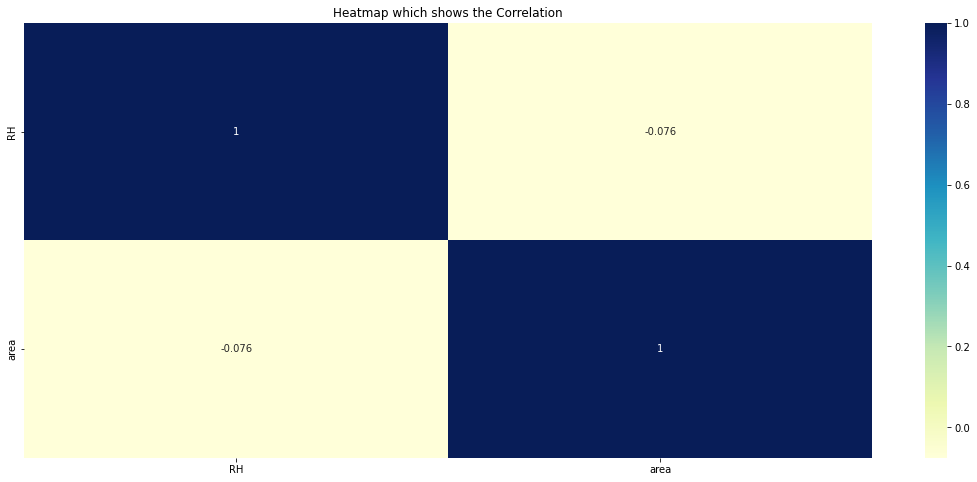

In [29]:
plt.figure(figsize=(19, 8))
correlation_heatmap = sns.heatmap(df3.corr(),cmap="YlGnBu", annot=True)
correlation_heatmap.set_title('Heatmap which shows the Correlation');

This tells us a few things. Our predictions may not be very accurate as our variable display a good deal of internal correlation but do not correlate with the labels quite well.

> The second and slightly more important bit, we can estimate the same answer using far fewer features. We will demonstrate this in the next segment.

## **Making Prediction Using Machine Learning Algorithms**

In [30]:
def recon(X):
  x_new=[]
  for i in X['month']:
    if i=='jan':
      x_new.append(1)
    elif i=='feb':
      x_new.append(2)
    elif i=='mar':
      x_new.append(3)
    elif i=='apr': 
      x_new.append(4) 
    elif i=='may':
      x_new.append(5)
    elif i=='jun': 
      x_new.append(6)
    elif i=='jul':   
      x_new.append(7)
    elif i=='aug':  
      x_new.append(8)
    elif i=='sep':  
      x_new.append(9)
    elif i=='oct':  
      x_new.append(10)
    elif i=='nov':  
      x_new.append(11)
    elif i=='dec':  
      x_new.append(12)    
  return x_new      

In [31]:
def recon2(x):
  x_new=[]
  for i in x['day']:
    if i=='mon':
      x_new.append(1)
    elif i=='tue':
      x_new.append(2)
    elif i=='wed':
      x_new.append(3)
    elif i=='thu':
      x_new.append(4)
    elif i=='fri':
      x_new.append(5)
    elif i=='sat':
      x_new.append(6)
    elif i=='sun':
      x_new.append(7)     
  return x_new      

In [32]:
def ar_cat(x):
  z=[]
  for i in x['area']:
    if i==0:
      z.append('No Damage')
    elif 1>i>0:
      z.append("low")
    elif 1<i<25:
      z.append('moderate')
    else:
      z.append("Severe")  
  return z 

In [33]:
df = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

In [34]:
from sklearn.model_selection import train_test_split
X=df
X_new_month=recon(X)
X['month']=X_new_month
X_new_days=recon2(X)
X['day']=X_new_days
y = X['area']
y1=ar_cat(X)
y=y1
X = X.drop('area', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [35]:
from sklearn import svm
model = svm.SVC(kernel='poly')
model.fit(X_train,y_train)

test_predicted = model.predict(X_test)
train_predicted = model.predict(X_train)

from sklearn.metrics import accuracy_score

train_accuracy = f1_score(y_train, train_predicted,average=None)
test_accuracy = f1_score(y_test, test_predicted,average=None)
print('SVM training accuracy is', train_accuracy)
print('SVM test accuracy is', test_accuracy)

SVM training accuracy is [0.64540338 0.         0.         0.        ]
SVM test accuracy is [0.64935065 0.         0.         0.        ]


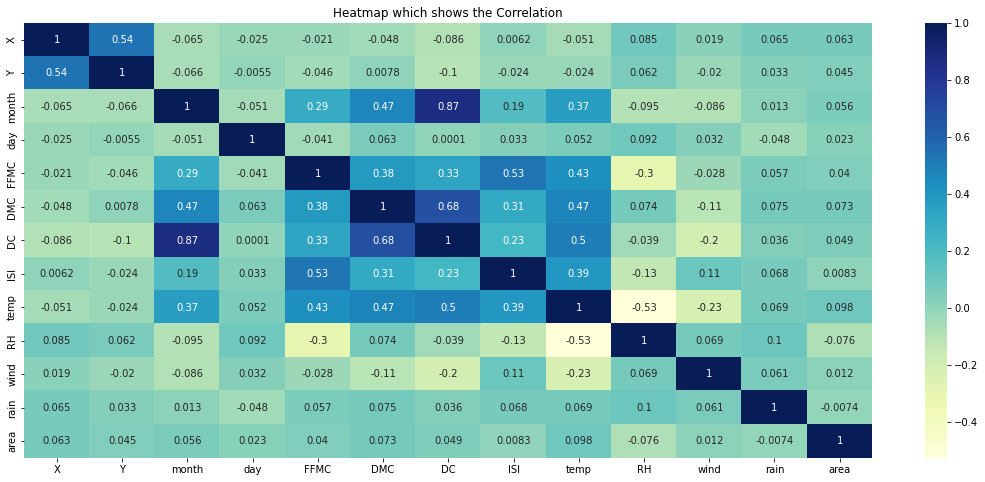

In [36]:
plt.figure(figsize=(19, 8))
correlation_heatmap = sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
correlation_heatmap.set_title('Heatmap which shows the Correlation');

From the original Heatmap we find that DMC, ISI and Wind are weakly correlated with the area and thus are not very accurate predictors of it, Therefore we drop those values. 

In [37]:
df2=df.drop(['DMC','ISI','FFMC','temp'],axis =1)

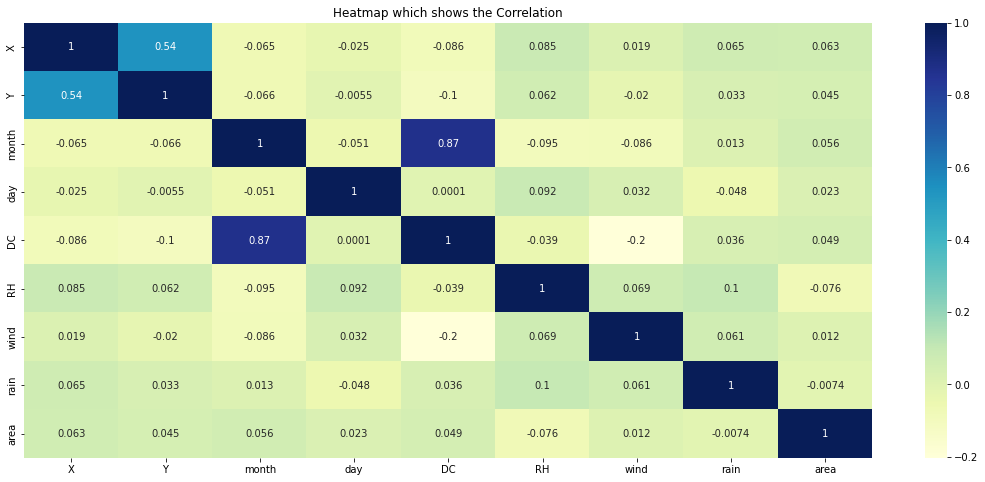

In [38]:
plt.figure(figsize=(19, 8))
correlation_heatmap = sns.heatmap(df2.corr(),cmap="YlGnBu", annot=True)
correlation_heatmap.set_title('Heatmap which shows the Correlation');

In [39]:
from pandas._libs.algos import diff_2d
from sklearn.model_selection import train_test_split
X=df2
y = X['area']
y1=ar_cat(X)
y=y1
X = X.drop('area', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7 ,min_samples_leaf=6 ,min_samples_split=4)
model.fit(X_train,y_train)
test_predicted = model.predict(X_test)
train_predicted = model.predict(X_train)

from sklearn.metrics import accuracy_score

train_accuracy = f1_score(y_train, train_predicted,average=None)
test_accuracy = f1_score(y_test, test_predicted,average=None)
print('DecisionTreeClassifier training accuracy is', train_accuracy)
print('DecisionTreeClassifier test accuracy is', test_accuracy)

DecisionTreeClassifier training accuracy is [0.72727273 0.13953488 0.         0.57959184]
DecisionTreeClassifier test accuracy is [0.54644809 0.         0.         0.28865979]


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train,y_train)
test_predicted = model.predict(X_test)
train_predicted = model.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = f1_score(y_train, train_predicted,average=None)
test_accuracy = f1_score(y_test, test_predicted,average=None)
print('RandomForestClassifier training accuracy is', train_accuracy)
print('RandomForestClassifier test accuracy is', test_accuracy)

RandomForestClassifier training accuracy is [0.68041237 0.         0.         0.36756757]
RandomForestClassifier test accuracy is [0.61244019 0.         0.         0.10526316]


In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
final = model.predict(X_test)

test_predicted = model.predict(X_test)
train_predicted = model.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = f1_score(y_train, train_predicted,average=None)
test_accuracy = f1_score(y_test, test_predicted,average=None)
print('GaussianNB training accuracy is', train_accuracy)
print('GaussianNB test accuracy is', test_accuracy)

GaussianNB training accuracy is [0.17525773 0.04761905 0.13793103 0.55579869]
GaussianNB test accuracy is [0.13636364 0.09090909 0.11111111 0.48913043]


In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
m1= GaussianNB()
m2=svm.SVC(kernel='poly')
m3=RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
m4=DecisionTreeClassifier(max_depth=7 ,min_samples_leaf=6 ,min_samples_split=4)
eclf1 = VotingClassifier(estimators=[ ('gnb', m1), ('rf', m3), ('dtc', m4),('svm',m2)], voting='hard')
eclf1.fit(X_train, y_train)
test_predicted = eclf1.predict(X_test)
train_predicted = eclf1.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, train_predicted)
test_accuracy = accuracy_score(y_test, test_predicted)
print('Ensemble training accuracy is', train_accuracy)
print('Ensemble test accuracy is', test_accuracy)

Ensemble training accuracy is 0.5373961218836565
Ensemble test accuracy is 0.4423076923076923


This is an expected answer so we do not concentrate too heavily on it. We intstead turn our attention to the df2 correlation heatmap. We see here that DC may be a good predictor of Rain, and we test this.

In [44]:
df3=df2.drop(['area'],axis=1)

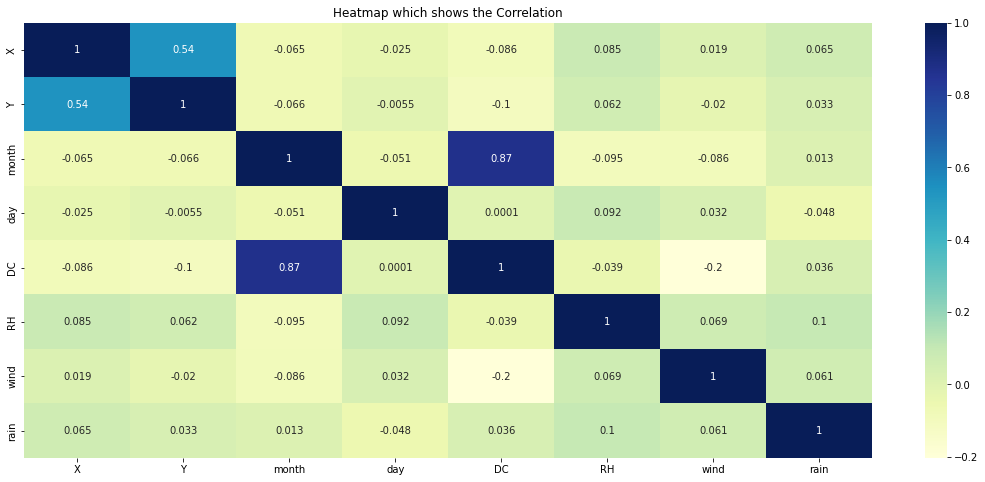

In [45]:
plt.figure(figsize=(19, 8))
correlation_heatmap = sns.heatmap(df3.corr(),cmap="YlGnBu", annot=True)
correlation_heatmap.set_title('Heatmap which shows the Correlation');

In [46]:
df = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

In [47]:
df2=df.drop(['DMC','ISI','FFMC','temp'],axis =1)
from pandas._libs.algos import diff_2d
from sklearn.model_selection import train_test_split
X=df2
X_new_month=recon(X)
X['month']=X_new_month
X_new_days=recon2(X)
X['day']=X_new_days
y = X['rain']

X = X.drop('rain', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [48]:
y_train

13     0.0
61     0.0
453    0.0
39     0.0
373    0.0
      ... 
129    0.0
144    0.0
72     0.0
235    0.0
37     0.0
Name: rain, Length: 361, dtype: float64

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
m1= GaussianNB()
m2=svm.SVC(kernel='poly')
m3=RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
m4=DecisionTreeClassifier(max_depth=7 ,min_samples_leaf=6 ,min_samples_split=4)
eclf1 = VotingClassifier(estimators=[ ('gnb', m1), ('rf', m3), ('dtc', m4),('svm',m2)], voting='hard')
eclf1.fit(X_train, y_train.astype(str))
test_predicted = eclf1.predict(X_test)
train_predicted = eclf1.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train.astype(str), train_predicted)
test_accuracy = accuracy_score(y_test.astype(str), test_predicted)
print('Ensemble training accuracy is', train_accuracy)
print('Ensemble test accuracy is', test_accuracy)

Ensemble training accuracy is 0.9889196675900277
Ensemble test accuracy is 0.9743589743589743


In [50]:
print(np.unique(df['DC']))

[  7.9   9.3  15.3  15.5  15.8  16.2  18.7  25.6  26.6  28.3  30.2  30.6
  32.1  34.   36.9  41.1  41.6  43.   43.5  43.6  46.7  48.3  52.8  55.
  55.2  56.9  57.3  58.3  64.7  67.6  70.8  73.7  74.3  77.5  80.8  83.7
  85.3  86.6  87.2  89.4  92.4  94.3  97.1  97.8 100.4 100.7 102.2 103.8
 106.7 113.8 171.4 200.  229.  232.1 233.8 252.6 290.8 296.3 297.7 298.1
 309.9 313.4 316.7 349.7 350.2 352.  352.6 353.5 354.6 355.2 366.7 368.3
 376.6 377.2 395.  411.8 423.4 424.1 430.8 431.6 433.3 437.7 440.9 442.1
 442.9 450.2 458.8 466.3 466.6 474.9 480.8 488.  495.6 503.6 513.3 520.5
 529.8 537.4 542.  550.3 560.  561.6 565.5 567.2 570.5 573.  575.8 578.8
 581.1 586.7 587.1 589.9 594.2 596.3 601.4 605.3 605.8 607.1 608.2 609.6
 613.  614.5 614.7 621.7 624.1 624.2 629.1 631.2 633.6 635.9 638.8 643.
 647.1 649.9 654.1 658.2 661.3 661.8 664.2 664.5 665.3 665.6 666.7 668.
 669.1 671.2 671.9 672.6 673.8 674.4 680.7 680.9 682.6 684.4 685.2 686.5
 686.9 689.1 690.  691.8 692.3 692.6 694.8 696.1 698.6

In [51]:
print(np.unique(df['rain']))

[0.  0.2 0.4 0.8 1.  1.4 6.4]


We have 7 classes, so it seems easier to predict the values of Rain. So we flip the test.



In [52]:
df2=df.drop(['DMC','ISI','FFMC','temp'],axis =1)
from pandas._libs.algos import diff_2d
from sklearn.model_selection import train_test_split
X=df2
X_new_month=recon(X)
X['month']=X_new_month
X_new_days=recon2(X)
X['day']=X_new_days
y = X['DC']
X = X.drop('DC', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [53]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train.astype(str))
final = model.predict(X_test)

test_predicted = model.predict(X_test)
train_predicted = model.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train.astype(str), train_predicted)
test_accuracy = accuracy_score(y_test.astype(str), test_predicted)
print('GaussianNB training accuracy is', train_accuracy)
print('GaussianNB test accuracy is', test_accuracy)

GaussianNB training accuracy is 0.8864265927977839
GaussianNB test accuracy is 0.24358974358974358


In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train,y_train.astype(str))
test_predicted = model.predict(X_test)
train_predicted = model.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train.astype(str), train_predicted)
test_accuracy = accuracy_score(y_test.astype(str), test_predicted)
print('GaussianNB training accuracy is', train_accuracy)
print('GaussianNB test accuracy is', test_accuracy)

GaussianNB training accuracy is 0.23268698060941828
GaussianNB test accuracy is 0.08974358974358974


In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
m1= GaussianNB()
m2=svm.SVC(kernel='poly')
m3=RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
m4=DecisionTreeClassifier(max_depth=7 ,min_samples_leaf=6 ,min_samples_split=4)
eclf1 = VotingClassifier(estimators=[ ('gnb', m1), ('rf', m3), ('dtc', m4),('svm',m2)], voting='hard')
eclf1.fit(X_train, y_train.astype(str))
test_predicted = eclf1.predict(X_test)
train_predicted = eclf1.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train.astype(str), train_predicted)
test_accuracy = accuracy_score(y_test.astype(str), test_predicted)
print('Ensemble training accuracy is', train_accuracy)
print('Ensemble test accuracy is', test_accuracy)

Ensemble training accuracy is 0.48476454293628807
Ensemble test accuracy is 0.15384615384615385


Another expected problem when you have something of the order of a 100 classes and sparse data.

(array([ 87.,   6.,  25.,  29.,  64., 217.,  89.]),
 array([  7.9       , 129.71428571, 251.52857143, 373.34285714,
        495.15714286, 616.97142857, 738.78571429, 860.6       ]),
 <a list of 7 Patch objects>)

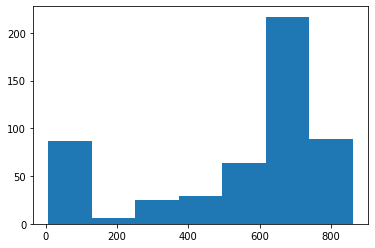

In [56]:
plt.hist(df['DC'],bins=7)

Now we turn this multiclass problem into the same range as the Number of labels in Rain i.e., 7.

In [57]:
q1=[  7.9  , 129.71428571, 251.52857143, 373.34285714,
        495.15714286, 616.97142857, 738.78571429, 860.6       ]

In [58]:
def reset(x):
  z=[]
  for i in x['DC']:
    if i>0 and i<=7.9:
      z.append(7.9)
    elif 129.714>=i>7.9:
      z.append(129.714)
    elif 251.52857143>=i> 129.714:
      z.append(251.52857143)
    elif 373.34285714>=i> 251.52857143:
      z.append(373.34285714)  
    elif  495.15714286>=i>373.34285714:
      z.append( 495.15714286)
    elif 616.97142857>=i> 495.15714286: 
      z.append(616.97142857)
    elif 738.78571429>=i>616.97142857:  
      z.append(738.78571429) 
    else:
      z.append( 860.6 ) 
  return z 

In [59]:
# df = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

In [60]:
df2=df.drop(['DMC','ISI','FFMC','temp'],axis =1)
from pandas._libs.algos import diff_2d
from sklearn.model_selection import train_test_split
X=df2
X_new_month=recon(X)
X['month']=X_new_month
X_new_days=recon2(X)
X['day']=X_new_days
y = reset(X)

X = X.drop('DC', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train,np.array(y_train).astype(str))
test_predicted = model.predict(X_test)
train_predicted = model.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(np.array(y_train).astype(str), train_predicted)
test_accuracy = accuracy_score(np.array(y_test).astype(str), test_predicted)
print('RandomForestClassifier training accuracy is', train_accuracy)
print('RandomForestClassifier test accuracy is', test_accuracy)

RandomForestClassifier training accuracy is 0.592797783933518
RandomForestClassifier test accuracy is 0.5576923076923077


In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
m1= GaussianNB()
m2=svm.SVC(kernel='poly')
m3=RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
m4=DecisionTreeClassifier(max_depth=7 ,min_samples_leaf=6 ,min_samples_split=4)
eclf1 = VotingClassifier(estimators=[ ('gnb', m1), ('rf', m3), ('dtc', m4),('svm',m2)], voting='hard')
eclf1.fit(X_train, np.array(y_train).astype(str))
test_predicted = eclf1.predict(X_test)
train_predicted = eclf1.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(np.array(y_train).astype(str), train_predicted)
test_accuracy = accuracy_score(np.array(y_test).astype(str), test_predicted)
print('Ensemble training accuracy is', train_accuracy)
print('Ensemble test accuracy is', test_accuracy)

Ensemble training accuracy is 0.6925207756232687
Ensemble test accuracy is 0.5576923076923077


##**Results Visualization on Map**

In [63]:
import folium

In [64]:
df3 = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

In [65]:
from sklearn.model_selection import train_test_split
X=df3
X_new_month=recon(X)
X['month']=X_new_month
X_new_days=recon2(X)
X['day']=X_new_days
y=X['area']
X = X.drop('area', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [66]:
results = ExtraTreesRegressor()
results.fit(X_train,y_train)
ypredictedtest = results.predict(X_test)
ypredict = ypredictedtest 

In [67]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred1=model.predict(X_test)
test_accuracy = mean_absolute_percentage_error(y_test, y_pred1)
print('LinearRegression test accuracy is', test_accuracy)

LinearRegression test accuracy is 2.886311841942453e+16


In [68]:
from sklearn import linear_model
model= linear_model.Ridge(alpha=.6)
model.fit(X_train,y_train)
y_pred2=model.predict(X_test)
test_accuracy = mean_absolute_percentage_error(y_test, y_pred2)
print('linear_model test accuracy is', test_accuracy)

linear_model test accuracy is 2.8720463532311548e+16


In [69]:
# Offset values to render original latititude and longitude 
x =X_test.iloc[6][0]+34.9 
y = X_test.iloc[6][1]-10.8

map = folium.Map(location=[x, y], zoom_start=20)
folium.Marker([x, y]).add_to(map)
folium.Circle([x, y],radius=(ypredict[6]),fill=True).add_to(map)
map